In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
df.info()

# Summary statistics
df.describe(include='all')


Shape of dataset: (150, 5)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [3]:
# Missing values
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing Values:\n", missing)

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())



Missing Values:
               missing_count  missing_percent
sepal_length              0              0.0
sepal_width               0              0.0
petal_length              0              0.0
petal_width               0              0.0
species                   0              0.0

Duplicate rows: 1


In [4]:
# Convert species to category
df['species'] = df['species'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


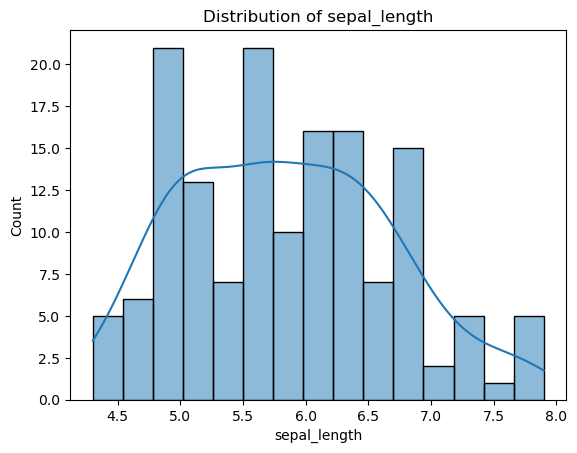

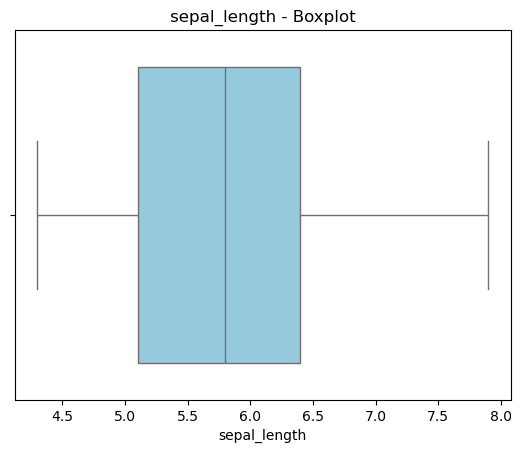

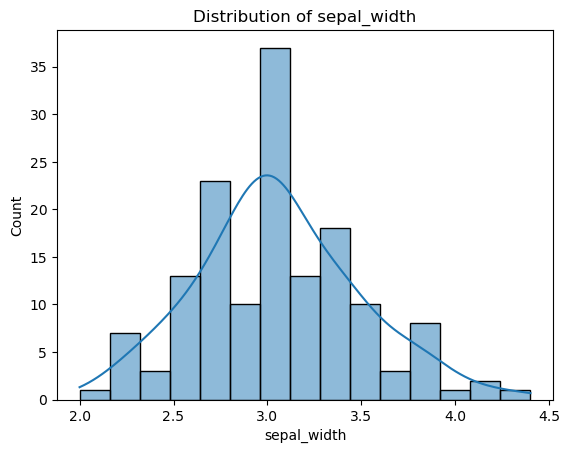

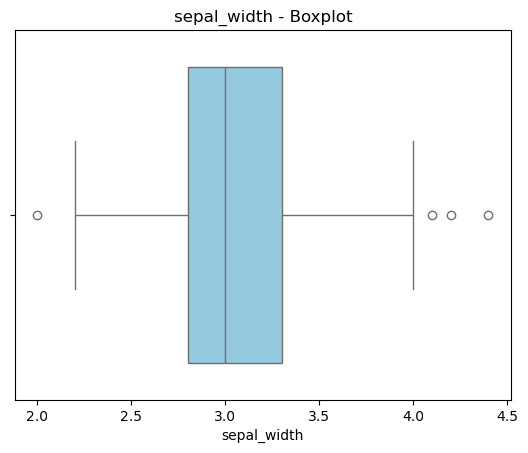

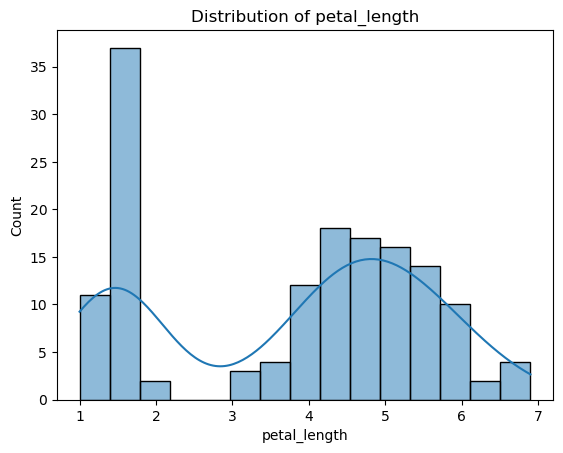

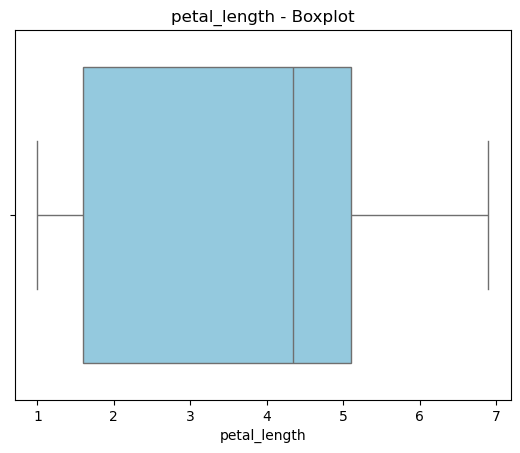

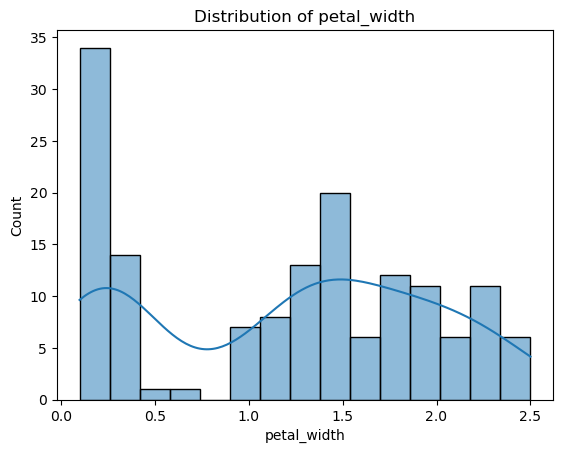

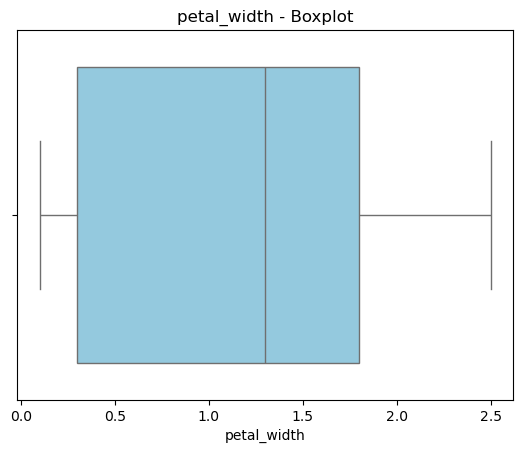

In [5]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for col in num_cols:
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} - Boxplot")
    plt.show()


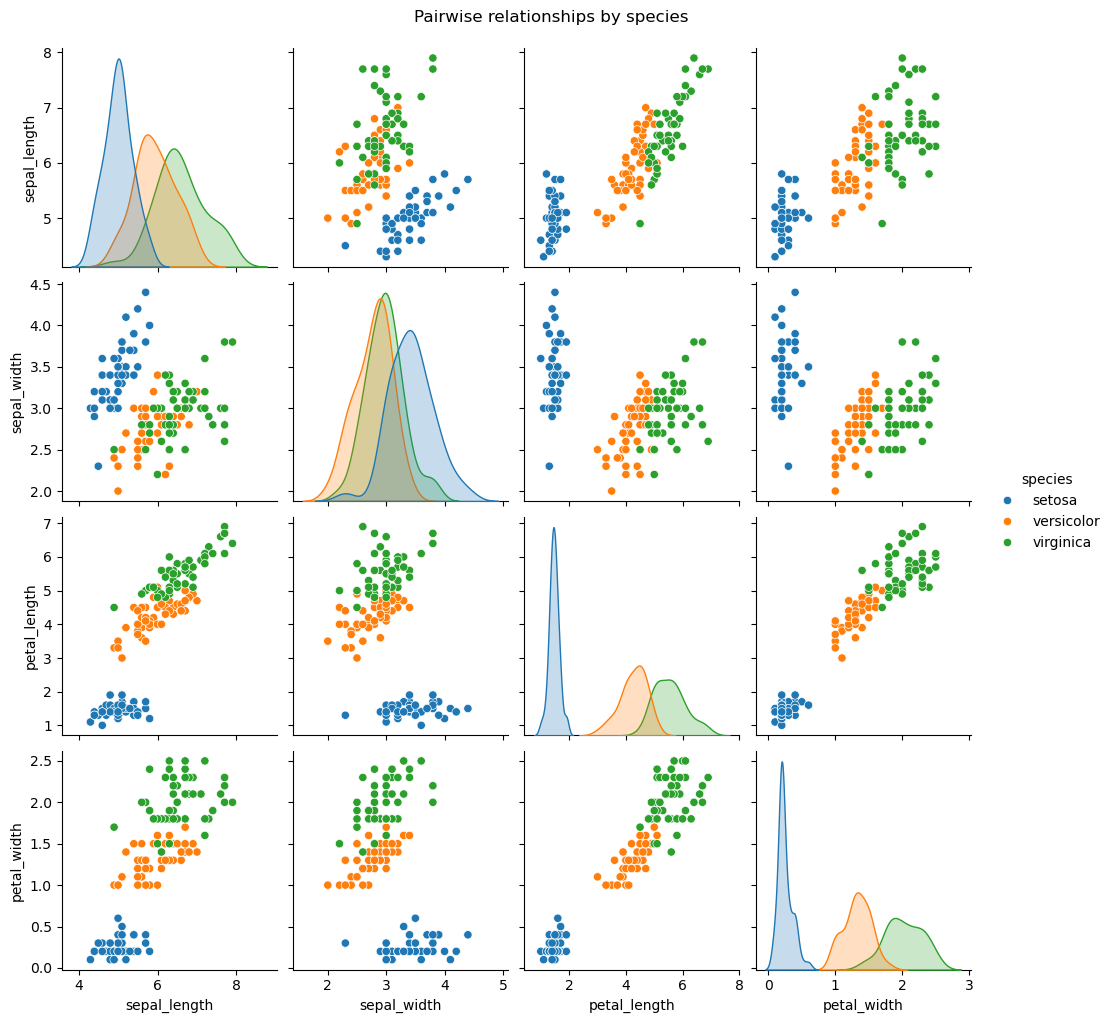

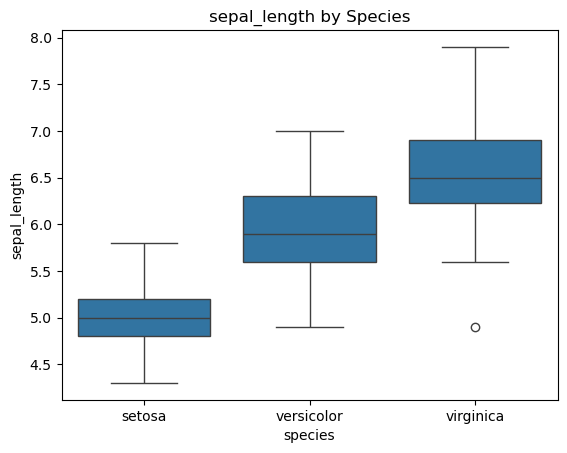

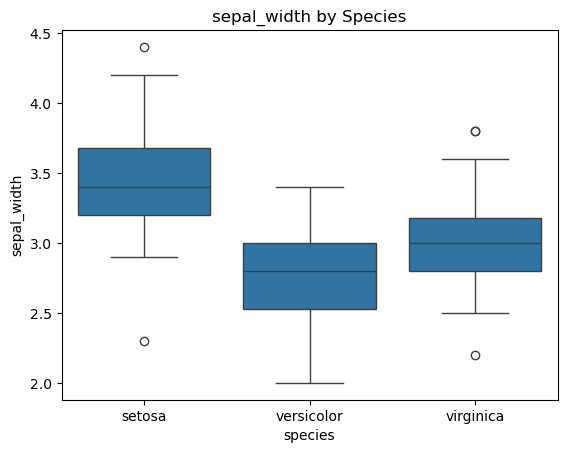

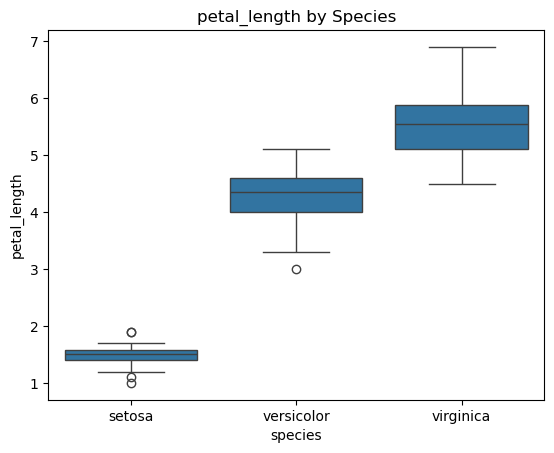

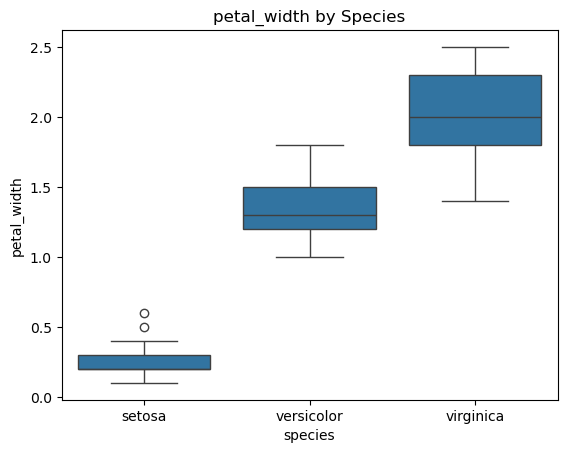

In [6]:
# Scatter plots of numeric features by species
sns.pairplot(df, hue='species')
plt.suptitle("Pairwise relationships by species", y=1.02)
plt.show()

# Boxplots of features vs species
for col in num_cols:
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f"{col} by Species")
    plt.show()


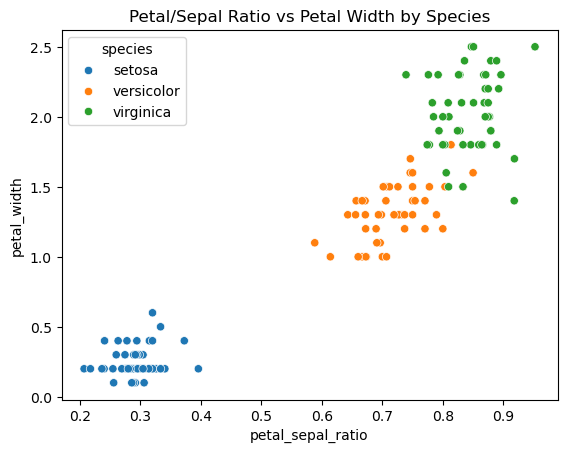

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.274510
1,4.9,3.0,1.4,0.2,setosa,0.285714
2,4.7,3.2,1.3,0.2,setosa,0.276596
3,4.6,3.1,1.5,0.2,setosa,0.326087
4,5.0,3.6,1.4,0.2,setosa,0.280000


In [7]:
# Petal to Sepal ratio
df['petal_sepal_ratio'] = df['petal_length'] / df['sepal_length']

sns.scatterplot(x='petal_sepal_ratio', y='petal_width', hue='species', data=df)
plt.title("Petal/Sepal Ratio vs Petal Width by Species")
plt.show()

df.head()


In [8]:
df.to_csv("iris_cleaned.csv", index=False)
print("\n✅ Cleaned Iris dataset saved as iris_cleaned.csv")



✅ Cleaned Iris dataset saved as iris_cleaned.csv
